**Ethan Ding SID: 3033043613**

**Instructions**
This project seeks to explore the linear coefficients that best fit the relationship between the various features of wine, and the quality score it is given by experts. The features we'll be exploring will be from the following list:

- Fixed Acidity
- Volatile Acidity
- Citric Acid
- Residual Sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol concentration

The report is broken into 5 sections:
1. Clening the data and describig it through scatterplots
2. An analysis of the results using Ordinary Least Squares
3. An analysis of the results using Ridge Regression (L2 Normalization)
4. An analysis of the results using LASSO Regression (L1 Normalization)
5. An analysis of the results using Elastic Net (L1 + L2 Normalization)

**Data Cleaning and Scatterplot**
For some basic clarity, we'll illustrate some scatterplots of the various features of the wine with the quality

Some things to note

- since the quality is effectively a categorical ordinal data, the values for qualiy are jittered in the scatterplots to give a better illustration of density (otherwise they would be on top of each other)
- there seems to be a slight positive correlation between quality and the following features, which would let us expect their coefficients to be positive 
    - fixed acidity
    - citric acid
    - sulphates
    - alcohol content
- a slight negative correlation between quality and the following features, which would let us expect their coefficients to be negative
    - volatile acidity
    - chlorides 
    - total sulphur dioxide
    - density
    - pH 
- no meaningful correlation between quality and the following, which would let us expect thier coefficients to be close to zero 
    - residual sugar
    - free sulphur dioxide

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [126]:
headers = ["fixed acidity", "volatile acidity", "citric acid", 
           "residual sugar", "chlorides", "free sulfur dioxide", 
           "total sulfur dioxide", "density", "pH",
           "sulphates","alcohol","quality"]
wine = pd.read_csv('wine-quality-red.csv', header = None, skiprows = 1, sep = ';', names = headers)

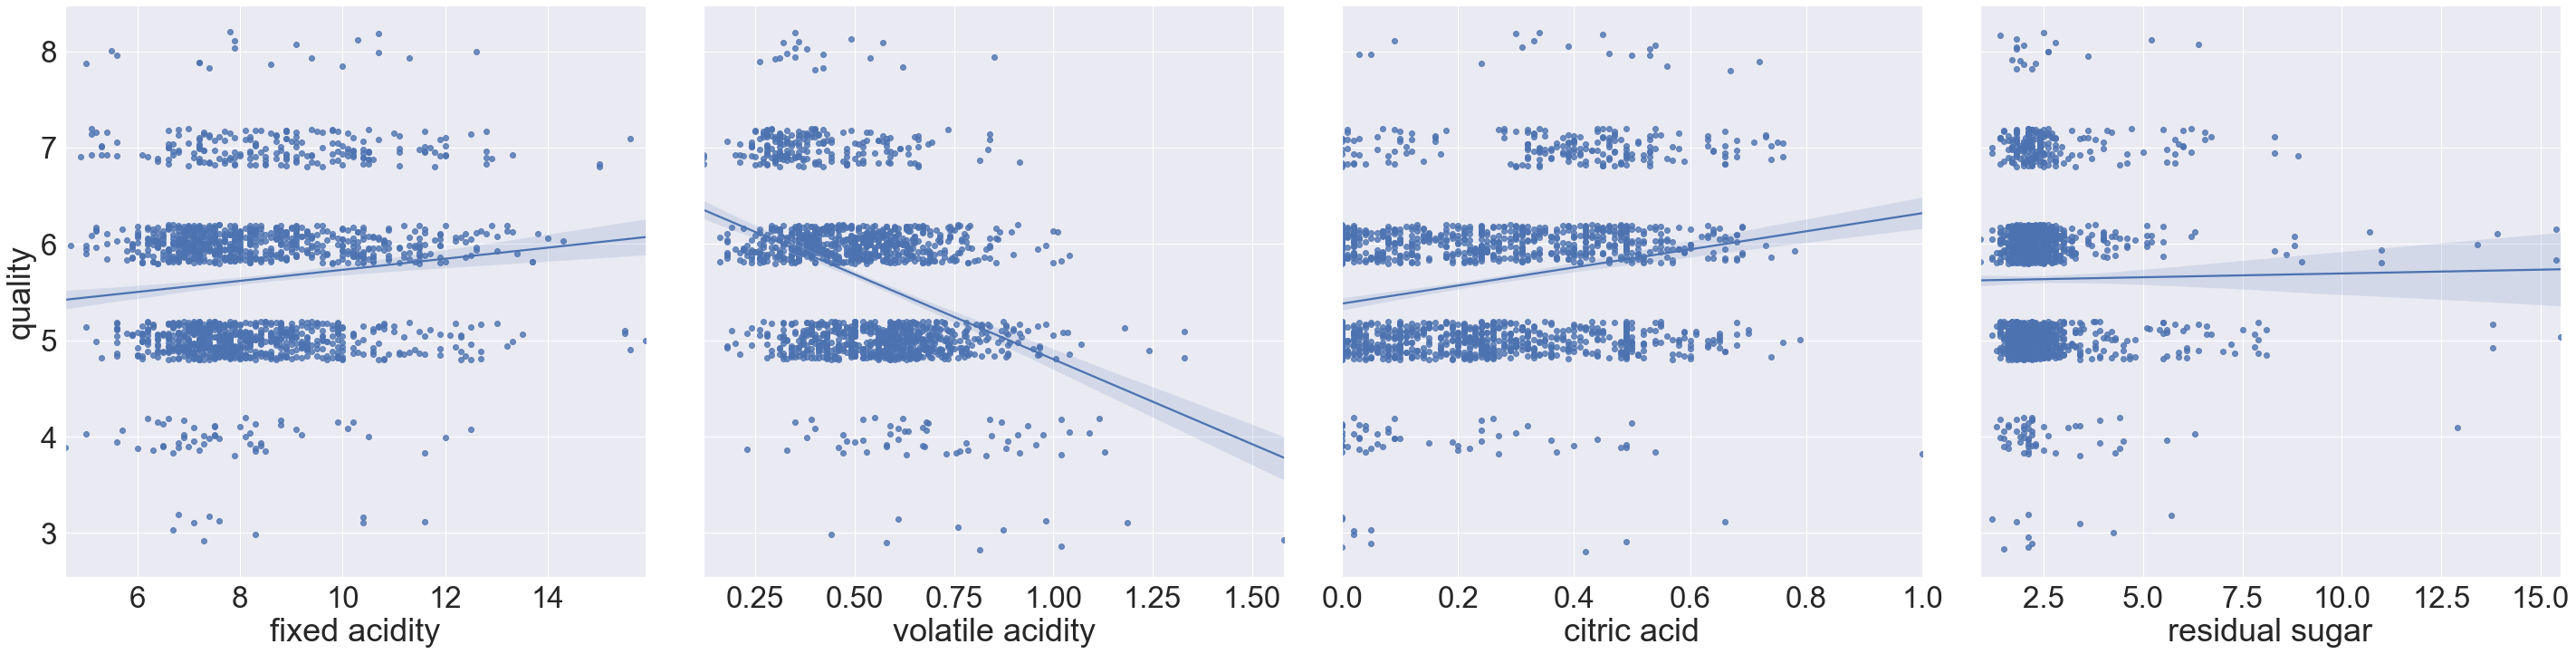

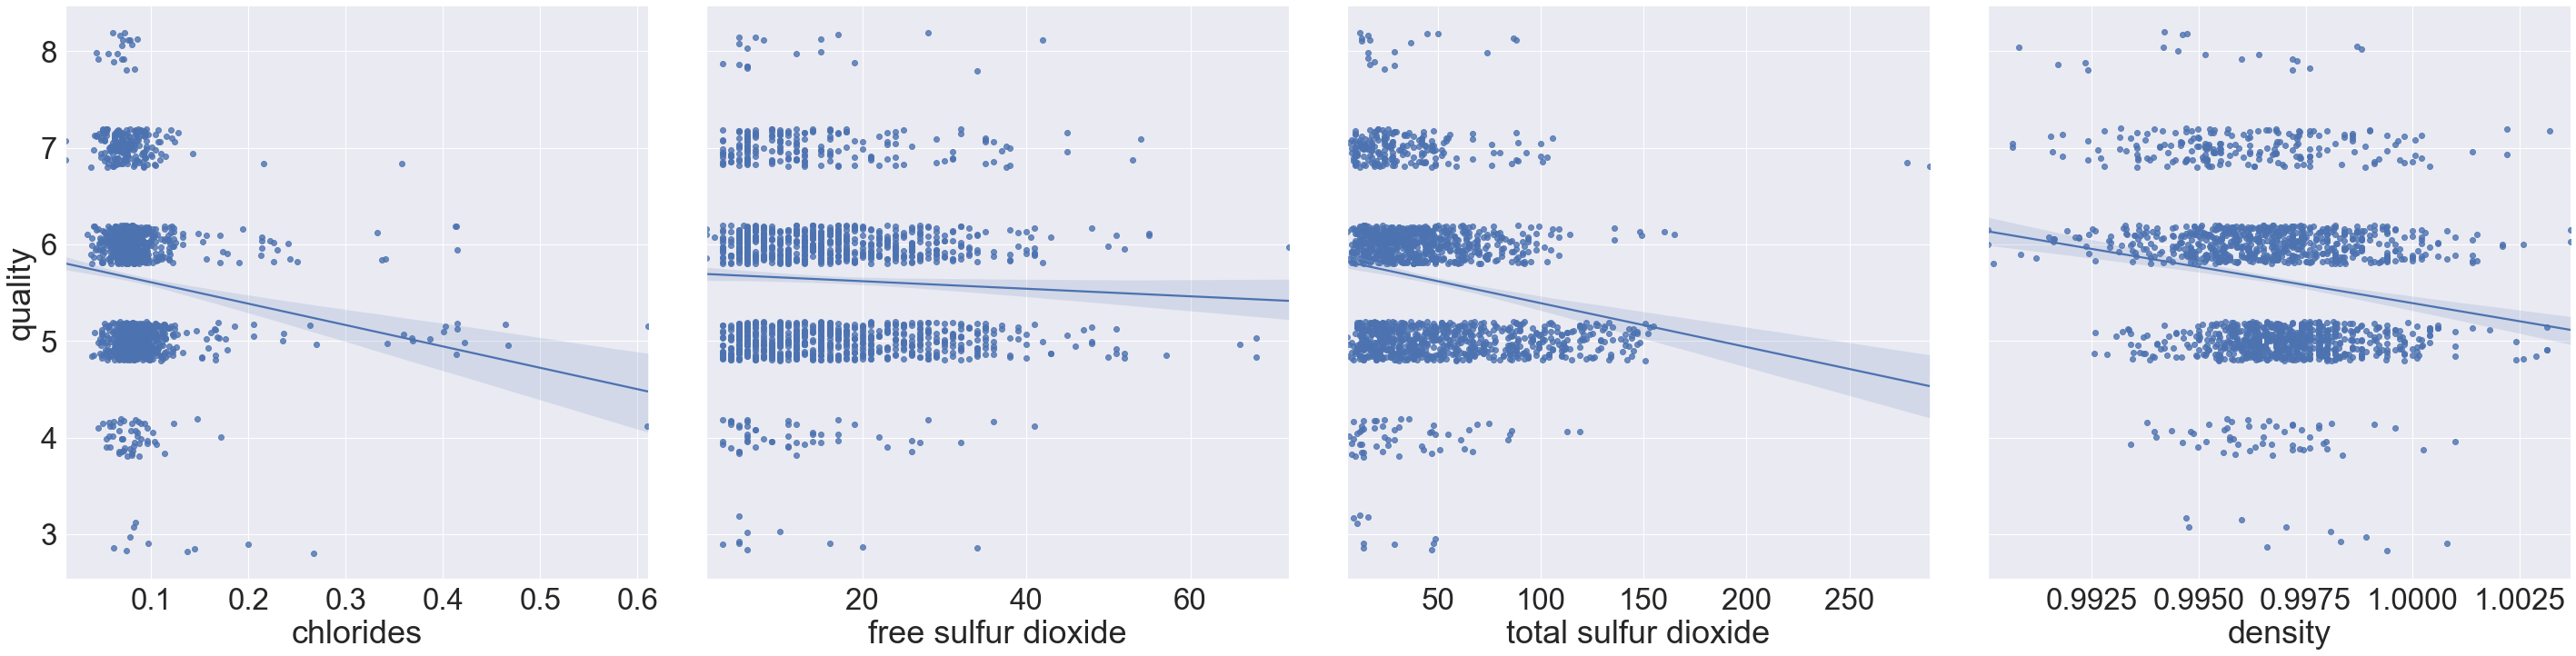

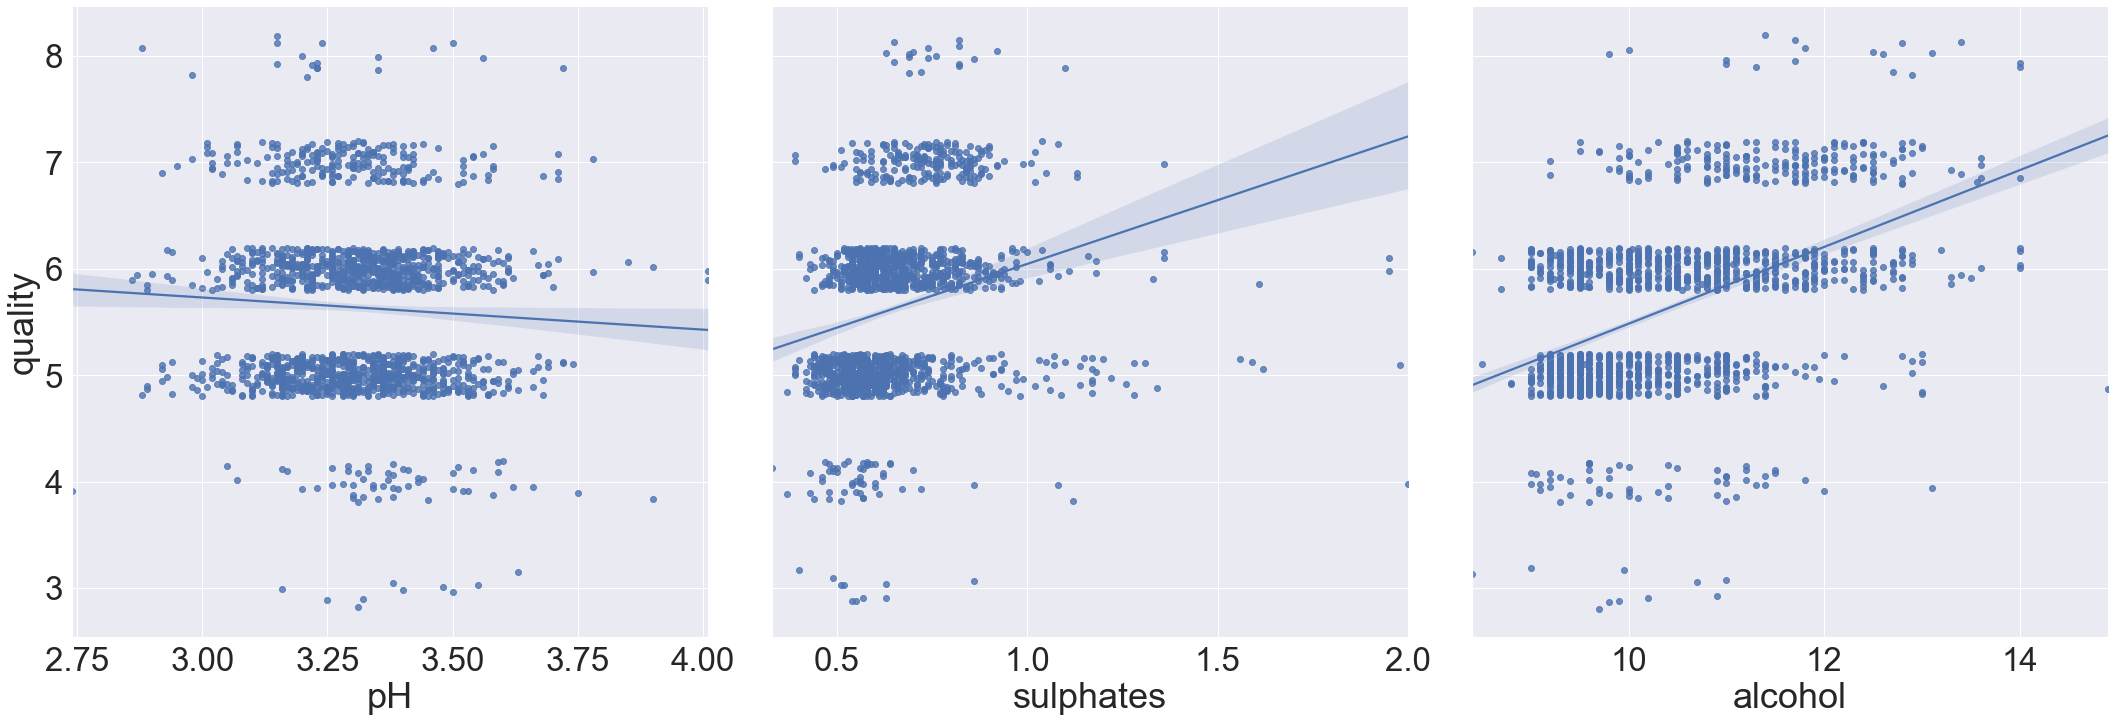

In [155]:
sns.set(font_scale=3)
a = sns.PairGrid(wine, y_vars=["quality"], 
                 x_vars=["fixed acidity", "volatile acidity", "citric acid", "residual sugar"], 
                 height=10)
b = sns.PairGrid(wine, y_vars=["quality"], 
                 x_vars=["chlorides", "free sulfur dioxide", "total sulfur dioxide", "density"], 
                 height=10)
c = sns.PairGrid(wine, y_vars=["quality"], 
                 x_vars=["pH", "sulphates","alcohol"], 
                 height=10) 
a.map(sns.regplot, y_jitter=0.2) #using a regplot bc scatterplot y_jiggle is broken 
b.map(sns.regplot, y_jitter=0.2) 
c.map(sns.regplot, y_jitter=0.2) 

**Ordinary Least Squares (OLS) Regression**

In the following section, we use Ordinary Least Squares regression to find coefficient matrices that can be used to predict the wine quality. To do this, we use the sklearn.linear_model.LinearRegression() method (documentation on https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), which the site describes as: 

*Ordinary least squares Linear Regression. LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.*

There are no tuning parameters related to Ordinary Least Squares, so cross-validation is not necessary in this case:

In [135]:
from sklearn.linear_model import LinearRegression

OLS_model = LinearRegression()
OLS_model.fit(X = wine[["fixed acidity", "volatile acidity", "citric acid", 
           "residual sugar", "chlorides", "free sulfur dioxide", 
           "total sulfur dioxide", "density", "pH",
           "sulphates","alcohol"]], y= wine['quality'])
display(OLS_model.coef_, 
        OLS_model.intercept_) #intercept is the constant

array([ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,  1.63312698e-02,
       -1.87422516e+00,  4.36133331e-03, -3.26457970e-03, -1.78811638e+01,
       -4.13653144e-01,  9.16334413e-01,  2.76197699e-01])

21.965208449451815

Below is a table of the beta values that minimize ordinary least squares linear regression model

| corresponding label  | beta coefficient  |
|---|---|
| intercept  | 21.965208449451815  |
| fixed acidity  | 2.49905527e-02  |
| volatiile acidity  |  -1.08359026e+00,  |
| citric acid  | -1.82563948e-01  |
| residual sugar  |  1.63312698e-02  |
| chlorides  |  -1.87422516e+00 |
| free sulfur dioxide  |  4.36133331e-03 |
| total sulfur dioxide  |  -3.26457970e-03 |
| density  |  -1.78811638e+01 |
| pH  |  -4.13653144e-01 |
| sulphates  |  9.16334413e-01 |
| alcohol  |  2.76197699e-01 |

To illustrate the accuracy of this linear regression model, I've created a graph that shows the absolute difference between the predicted values for quality and the corresponding real quality value. The closer each datapoint is to 0, the more accurate the prediction. 

The prediction seems to be fairly decent: ~89% of the predictions are well within 1 point of the actual quality, and only ~0.56% of the values are more than 2 units off.

Percentage of datapoints more than 1 unit off:  11.0694 %
Percentage of datapoints more than 2 units off: 0.5629 %


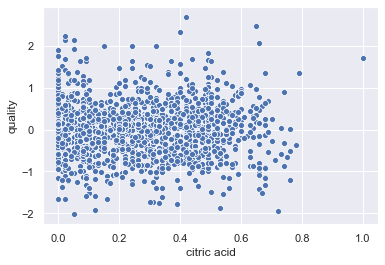

In [188]:
OLS_quality_prediction = OLS_model.predict(wine[["fixed acidity", "volatile acidity", "citric acid", 
           "residual sugar", "chlorides", "free sulfur dioxide", 
           "total sulfur dioxide", "density", "pH",
           "sulphates","alcohol"]])
accuracy = OLS_quality_prediction - wine['quality']
sns.set(font_scale=1, )
sns.scatterplot(x=wine['citric acid'], y=accuracy); #chose to use citric acid as the x 
                                                    #axis since it showed the most even distribution of points 
one_off = (sum(accuracy > 1) + sum(accuracy < -1))/accuracy.size*100
one_off = round(one_off, 4)
two_off = (sum(accuracy > 2) + sum(accuracy < -2))/accuracy.size*100
two_off = round(two_off, 4)

print('Percentage of datapoints more than 1 unit off: ', one_off,'%')
print('Percentage of datapoints more than 2 units off:', two_off,'%')

**Ridge Regression**

In the following section, we use ridge regression to create a linear model that prediccts wine quality using the features of wine. 



There are no tuning parameters related to Ordinary Least Squares, so cross-validation is not necessary in this case:

In [189]:
!jupyter nbconvert IEOR165_Project.ipynb --to pdf

[NbConvertApp] Converting notebook IEOR165_Project.ipynb to pdf
[NbConvertApp] Support files will be in IEOR165_Project_files/
[NbConvertApp] Making directory ./IEOR165_Project_files
[NbConvertApp] Making directory ./IEOR165_Project_files
[NbConvertApp] Making directory ./IEOR165_Project_files
[NbConvertApp] Making directory ./IEOR165_Project_files
[NbConvertApp] Writing 37701 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 651306 bytes to IEOR165_Project.pdf
